Лабораториска вежба 1 - Живче Глгиров 216139

Imports:

In [103]:
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_score




Load dataset:

In [56]:
df = pd.read_csv("dataset/character-predictions.csv")
df

,S.No,actual,pred,alive,plod,name,title,male,culture,dateOfBirth,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,0,0,0.054,0.946,Viserys II Targaryen,NaN,1,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,0,0.387,0.613,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,0,0.493,0.507,Addison Hill,Ser,1,NaN,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,0,0.076,0.924,Aemma Arryn,Queen,0,NaN,82.0,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,1,1,0.617,0.383,Sylva Santagar,Greenstone,0,Dornish,276.0,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,0,1,0.803,0.197,Luwin,NaN,1,Westeros,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,0,1,0.987,0.013,Reek,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,1,0.520,0.480,Symeon Star-Eyes,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,1,0.637,0.363,Coldhands,NaN,1,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


Data Preprocessing:

- Remove textual attributes and prediction columns:

In [57]:
df=df.drop(columns=['actual', 'pred', 'alive', 'plod', 'name', 'title'])
df

,S.No,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1941,1942,1,Westeros,NaN,299.0,NaN,NaN,NaN,House Stark,NaN,...,NaN,NaN,0,0,NaN,0,0,1,0.351171,0
1942,1943,1,NaN,NaN,299.0,NaN,NaN,NaN,House Bolton,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.096990,0
1943,1944,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.030100,1
1944,1945,1,NaN,NaN,NaN,NaN,NaN,NaN,Three-eyed crow,NaN,...,NaN,NaN,0,0,NaN,0,0,0,0.130435,1


Getting to know the given set:


In [65]:
df.head()


,S.No,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,spouse,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
0,1,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,0.0,NaN,0,0,NaN,11,1,1,0.605351,0
1,2,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,1.0,1,1,97.0,1,1,1,0.896321,1
2,3,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,0,1,NaN,0,0,0,0.267559,1
3,4,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,0.0,1,1,23.0,0,0,0,0.183946,0
4,5,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,1.0,1,1,29.0,0,0,0,0.043478,1


- Summary Statistics:

In [66]:
df.describe()


,S.No,male,dateOfBirth,DateoFdeath,book1,book2,book3,book4,book5,isAliveMother,...,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,boolDeadRelations,isPopular,popularity,isAlive
count,1946.000000,1946.000000,433.000000,444.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000,21.000000,...,23.000000,276.000000,1946.000000,1946.000000,433.000000,1946.000000,1946.000000,1946.000000,1946.000000,1946.000000
mean,973.500000,0.619219,1577.364896,2950.193694,0.198356,0.374615,0.480473,0.591984,0.395170,0.714286,...,0.652174,0.778986,0.141829,0.460946,-1293.563510,0.305755,0.074512,0.059096,0.089584,0.745632
std,561.906131,0.485704,19565.414460,28192.245529,0.398864,0.484148,0.499747,0.491593,0.489013,0.462910,...,0.486985,0.415684,0.348965,0.498601,19564.340993,1.383910,0.262669,0.235864,0.160568,0.435617
min,1.000000,0.000000,-28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,-298001.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,487.250000,0.000000,240.000000,282.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,0.013378,0.000000
50%,973.500000,1.000000,268.000000,299.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,27.000000,0.000000,0.000000,0.000000,0.033445,1.000000
75%,1459.750000,1.000000,285.000000,299.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,1.000000,50.000000,0.000000,0.000000,0.000000,0.086957,1.000000
max,1946.000000,1.000000,298299.000000,298299.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,100.000000,15.000000,1.000000,1.000000,1.000000,1.000000


- Data Visualization:

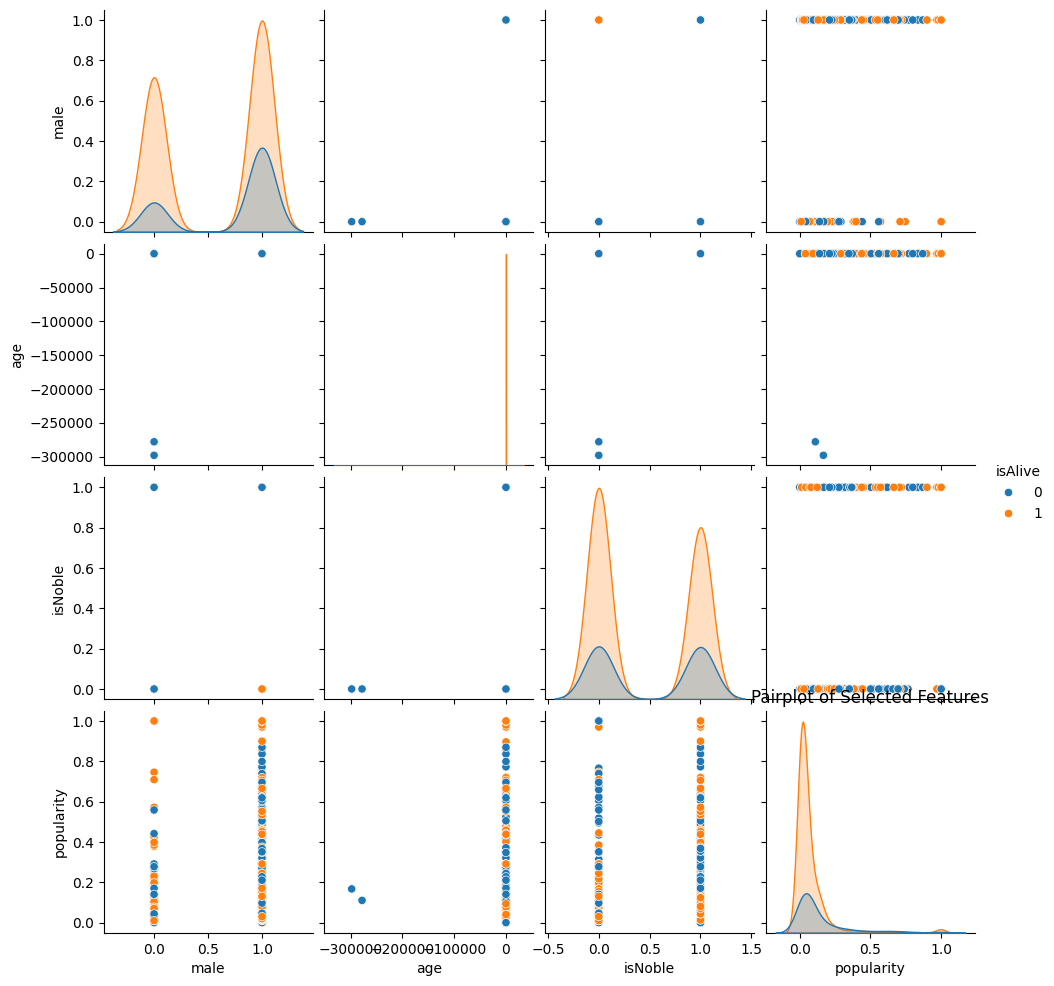

In [67]:
sns.pairplot(df, hue='isAlive', vars=['male', 'age', 'isNoble', 'popularity'])
plt.title("Pairplot of Selected Features")
plt.show()

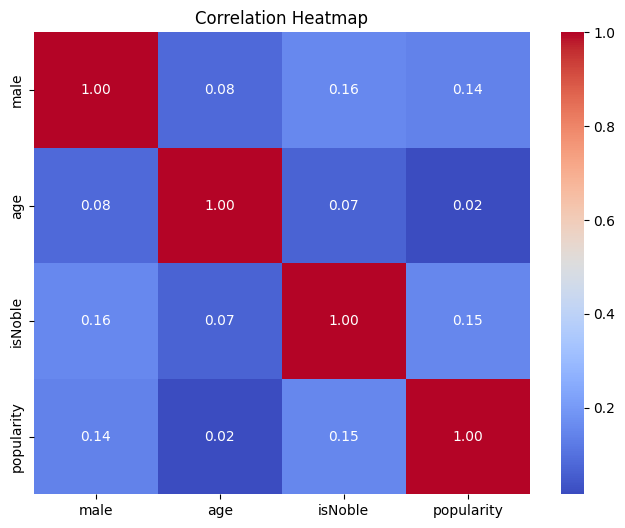

In [69]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[['male', 'age', 'isNoble', 'popularity']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

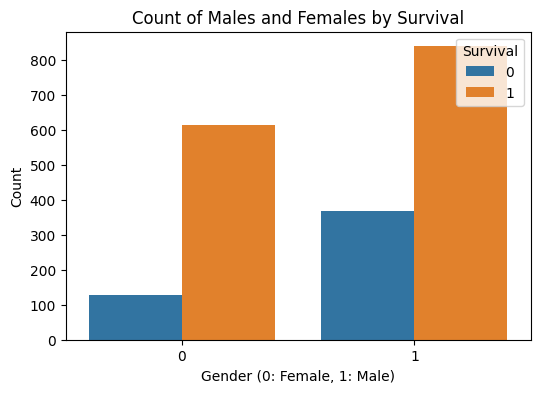

In [70]:
plt.figure(figsize=(6, 4))
sns.countplot(x='male', hue='isAlive', data=df)
plt.xlabel("Gender (0: Female, 1: Male)")
plt.ylabel("Count")
plt.title("Count of Males and Females by Survival")
plt.legend(title="Survival", loc='upper right')
plt.show()

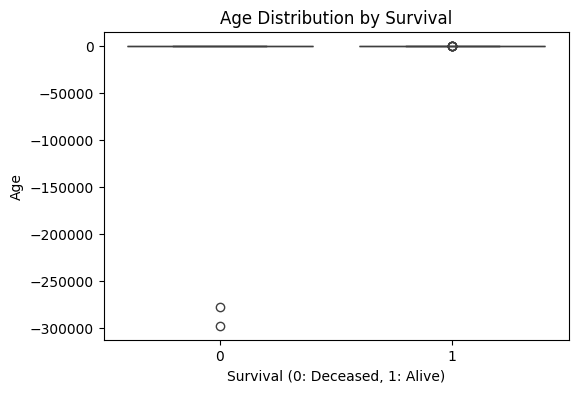

In [71]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='isAlive', y='age', data=df)
plt.xlabel("Survival (0: Deceased, 1: Alive)")
plt.ylabel("Age")
plt.title("Age Distribution by Survival")
plt.show()

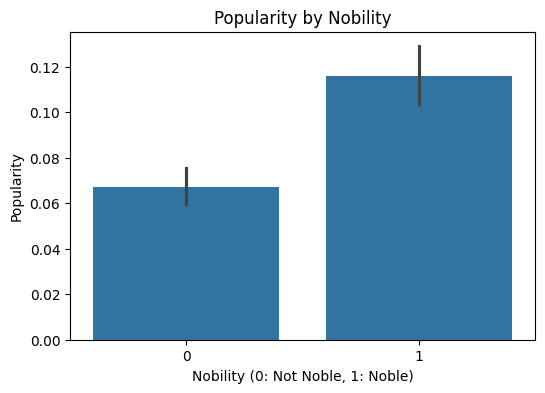

In [72]:
plt.figure(figsize=(6, 4))
sns.barplot(x='isNoble', y='popularity', data=df)
plt.xlabel("Nobility (0: Not Noble, 1: Noble)")
plt.ylabel("Popularity")
plt.title("Popularity by Nobility")
plt.show()

- Classification

In [129]:
# Select relevant features
selected_features = ['male', 'age', 'isNoble', 'popularity']
X = df[selected_features]

# Prepare the target variable
y = df['isAlive']

# Impute missing values with the mean (for numeric features)
X.loc[:, 'age'] = X['age'].fillna(X['age'].mean())
X.loc[:, 'popularity'] = X['popularity'].fillna(X['popularity'].mean())


In [135]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [139]:
# Initialize classifiers
classifiers = {
    'Naïve Bayes': GaussianNB(),
    'LDA': LinearDiscriminantAnalysis(),
    'QDA': QuadraticDiscriminantAnalysis()
}

# Train classifiers and calculate precision for StandardScaler
precision_scores_standard = {}

for name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred_standard = classifier.predict(X_test)
    precision_scores_standard[name] = precision_score(y_test, y_pred_standard)

    # Calculate average precision
    average_precision_standard = average_precision_score(y_test, y_pred_standard)
    predicted = classifier.predict(X_test)


        print(f"{model} accuracy: {model.score(x_test, y_test)}")ø
    print(f"{name} average precision: {average_precision_standard}")



Naïve Bayes average precision: 0.7609254498714653
LDA average precision: 0.7722064543399622
QDA average precision: 0.7675655772261515
